In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import json
import tifffile as tf
import sys
sys.path.append("../../network_extraction/src/")
from real_data import write_tiff
sys.path.append("../src/")
from surface_extraction import *
import cupy as cp

In [3]:
configs_path = "../configs.json"
with open(configs_path, "r") as f:
    configs = json.load(f)

In [4]:
image = tf.imread(configs["CD44"])[::-1]

In [15]:
surface1 = tf.imread("/data_nfs/je30bery/synovium_surface/data/exp2/surface_with_adaptive_thresholding_C=5_window_size=10_z_expansion=2.tif")[::-1]
surface2 = tf.imread("/data_nfs/je30bery/synovium_surface/data/exp2/surface_with_adaptive_thresholding_C=5_window_size=10_z_expansion=4.tif")[::-1]

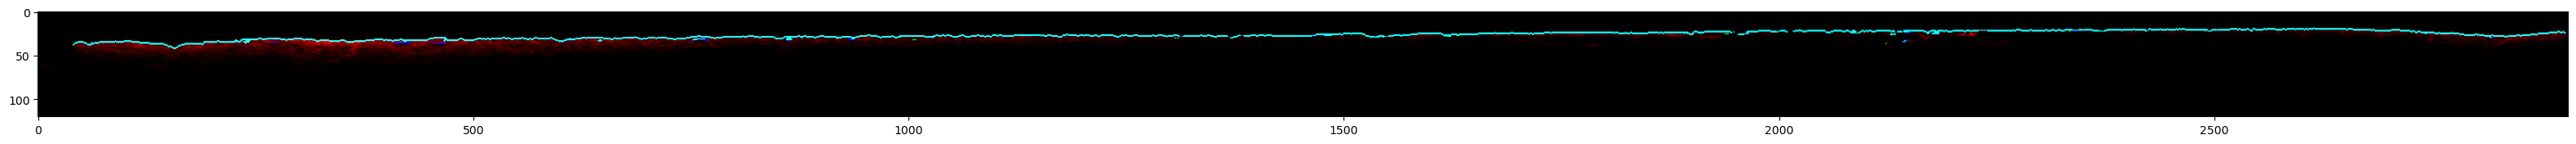

In [16]:
plt.figure(figsize=(40, 5))
r = (image[:, 500].astype(int) / np.max(image[:, 500].astype(int)) * 255).astype(int)
g = surface1[:, 500]
b = surface2[:, 500]

rgb = np.array([r, g, b]).astype(np.uint8).transpose((1, 2, 0))
plt.imshow(rgb)

In [5]:
binary_image = binarize_image(image, window_size=10, C=5)

In [9]:
r = (image[:, 500].astype(int) / np.max(image[:, 500].astype(int)) * 255).astype(int)
b = cp.asnumpy(binarize_image(cp.array(image), window_size=10, C=5))[:, 500].astype(int)
rgb1 = np.array([r, np.zeros_like(b), np.zeros_like(b)]).astype(np.uint8).transpose((1, 2, 0))
rgb2 = np.array([np.zeros_like(b), b, np.zeros_like(b)]).astype(np.uint8).transpose((1, 2, 0))
rgb3 = np.array([r, 150 * b, np.zeros_like(b)]).astype(np.uint8).transpose((1, 2, 0))

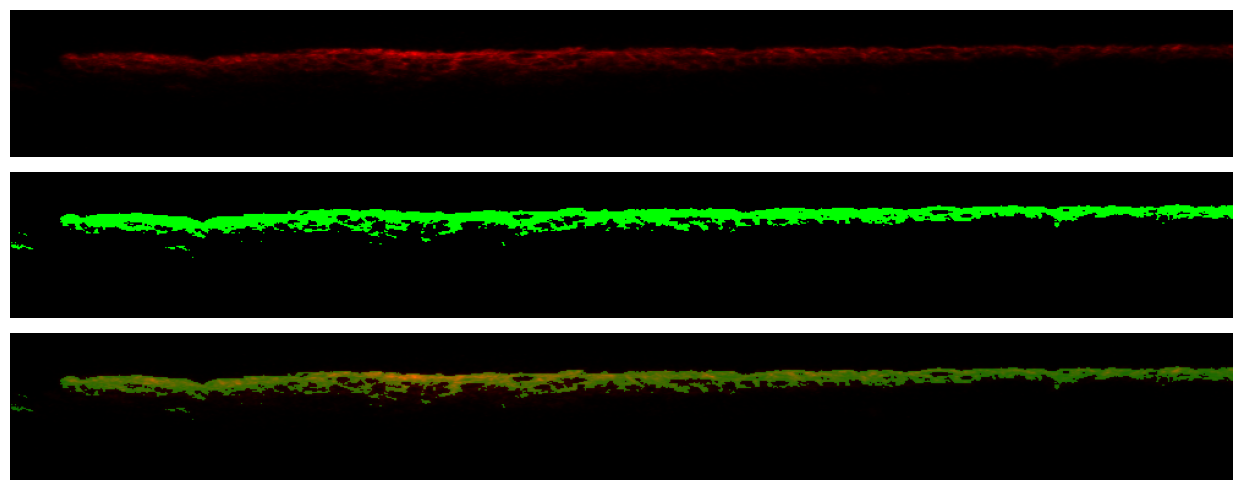

In [10]:
f, axs= plt.subplots(3, figsize=(40, 5))
axs[0].imshow(rgb1[:, :1000])
axs[1].imshow(rgb2[:, :1000])
axs[2].imshow(rgb3[:, :1000])
axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")
plt.tight_layout()
plt.savefig("binarization.png")

In [11]:
biggest_connected_volume = get_biggest_connected_component(binary_image)

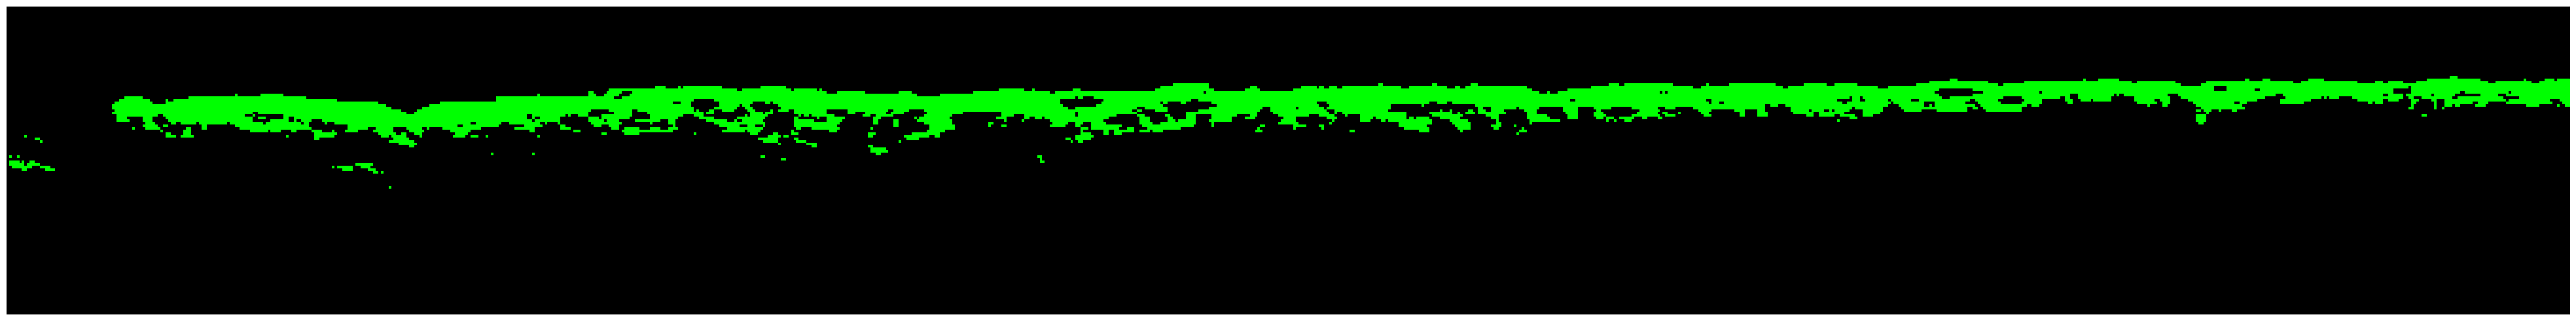

In [12]:
g = cp.asnumpy(binarize_image(cp.array(image), window_size=10, C=5))[:, 500].astype(int)
b = cp.asnumpy(biggest_connected_volume)[:, 500].astype(int)

rgb1 = np.array([np.zeros_like(b), g, b]).astype(np.uint8).transpose((1, 2, 0))

f, axs= plt.subplots(1, figsize=(40, 5))
axs.imshow(rgb1[:, :1000])
axs.axis("off")
plt.tight_layout()
plt.savefig("binarization.png")

In [ ]:
shape_3d = biggest_connected_volume.shape
print("caluclating the morphological gradient")
morph_grad = get_morph_gradient(biggest_connected_volume)
print("assigning labels to gradient")
surface = expand_labels_on_morph(morph_grad, shape_3d, z_expansion=4)
return cp.asnumpy(surface)

caluclating the morphological gradient
assigning labels to gradient


In [ ]:
g = cp.asnumpy(binarize_image(cp.array(image), window_size=10, C=5))[:, 500].astype(int)
b = cp.asnumpy(biggest_connected_volume)[:, 500].astype(int)

rgb1 = np.array([np.zeros_like(b), g, b]).astype(np.uint8).transpose((1, 2, 0))

f, axs= plt.subplots(1, figsize=(40, 5))
axs.imshow(rgb1[:, :1000])
axs.axis("off")
plt.tight_layout()
plt.savefig("binarization.png")

In [ ]:
plt.figure(figsize=(40, 5))
plt.imshow(r)